In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import community as community_louvain

# Load the dataset (adjust the path accordingly)
nft_data = pd.read_csv("First Draft dataset", parse_dates=['timestamp_column'])
nft_data.set_index('timestamp_column', inplace=True)

# Create a directed graph to represent transactions between addresses
G = nx.DiGraph()

# Loop through the dataset to populate the graph
for index, row in nft_data.iterrows():
    buyer = row['buyer_address']
    seller = row['seller_address']
    if buyer and seller:  # Skip rows where either address is missing
        if G.has_edge(seller, buyer):
            G[seller][buyer]['weight'] += 1
        else:
            G.add_edge(seller, buyer, weight=1)

# Convert the directed graph to an undirected graph for community detection
H_undirected = G.to_undirected()

# Compute the best partition using the Louvain algorithm for community detection
partition = community_louvain.best_partition(H_undirected)

# Create a new graph to visualize the communities
G_communities = nx.Graph()
for node, community_id in partition.items():
    G_communities.add_node(node, community=community_id)

# Add edges and attributes to the new graph
for u, v, d in G.edges(data=True):
    weight = d['weight']
    G_communities.add_edge(u, v, weight=weight)

# Draw the graph with nodes color-coded by community
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_communities, seed=42)
node_colors = [partition[node] for node in G_communities.nodes]
nx.draw(G_communities, pos, node_color=node_colors, with_labels=False, node_size=700, cmap=plt.cm.jet)
plt.title("Community Detection: Nodes Color-Coded by Community")
plt.show()


ModuleNotFoundError: No module named 'community'

C:\Users\USER\AppData\Local\Temp\ipykernel_11580\3835823119.py:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  nft_data = pd.read_csv(dataset_path, parse_dates=['timestamp', 'minted_timestamp'])


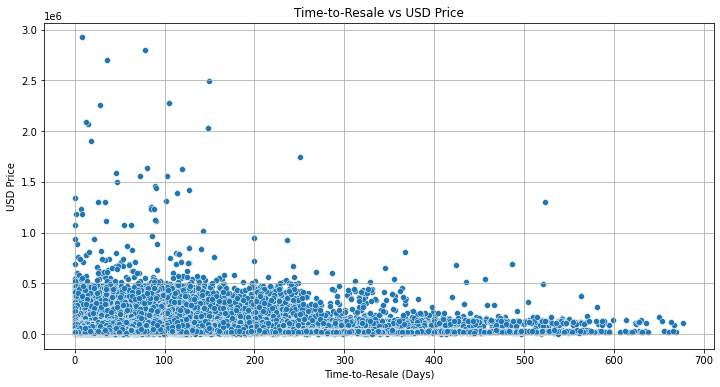

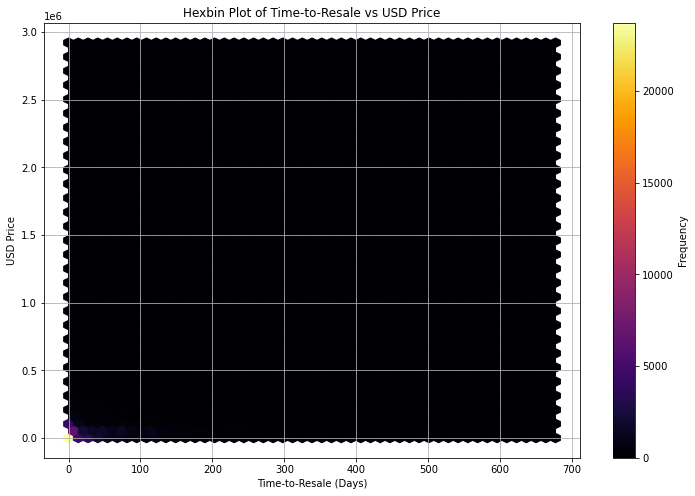

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

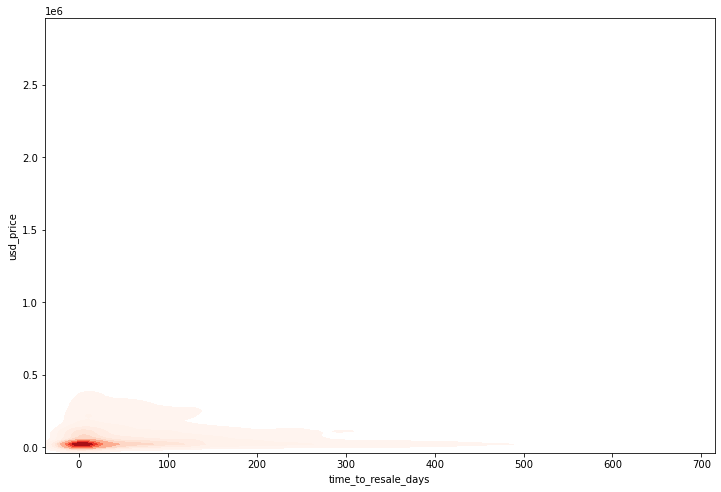

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Load the dataset
dataset_path = "First Draft dataset.csv"  # Replace with your dataset path
nft_data = pd.read_csv(dataset_path, parse_dates=['timestamp', 'minted_timestamp'])

# Sorting the data by token_id and timestamp
nft_data_sorted = nft_data.sort_values(by=['token_id', 'timestamp'])

# Calculating the time difference between subsequent sales for each token_id
nft_data_sorted['time_to_resale'] = nft_data_sorted.groupby('token_id')['timestamp'].diff()

# Converting the time difference to days for easier interpretation
nft_data_sorted['time_to_resale_days'] = nft_data_sorted['time_to_resale'].dt.total_seconds() / (24 * 60 * 60)

# Filtering out rows where time_to_resale_days is NaN
nft_resale_data = nft_data_sorted[nft_data_sorted['time_to_resale_days'].notna()]

# Scatter plot to visualize the time-to-resale against the resale value (usd_price)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=nft_resale_data, x='time_to_resale_days', y='usd_price')
plt.title('Time-to-Resale vs USD Price')
plt.xlabel('Time-to-Resale (Days)')
plt.ylabel('USD Price')
plt.grid(True)
plt.show()

# Hexbin plot for a more advanced visualization
plt.figure(figsize=(12, 8))
hb = plt.hexbin(nft_resale_data['time_to_resale_days'], nft_resale_data['usd_price'], gridsize=50, cmap='inferno')
plt.colorbar(hb).set_label('Frequency')
plt.title('Hexbin Plot of Time-to-Resale vs USD Price')
plt.xlabel('Time-to-Resale (Days)')
plt.ylabel('USD Price')
plt.grid(True)
plt.show()

# 2D Kernel Density Plot for an even more advanced visualization
plt.figure(figsize=(12, 8))
sns.kdeplot(x=nft_resale_data['time_to_resale_days'], y=nft_resale_data['usd_price'], cmap='Reds', fill=True)
plt.colorbar().set_label('Density')
plt.title('2D Kernel Density Plot of Time-to-Resale vs USD Price')
plt.xlabel('Time-to-Resale (Days)')
plt.ylabel('USD Price')
plt.grid(True)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_11580\966706134.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  nft_data = pd.read_csv(dataset_path, parse_dates=['timestamp', 'minted_timestamp'])


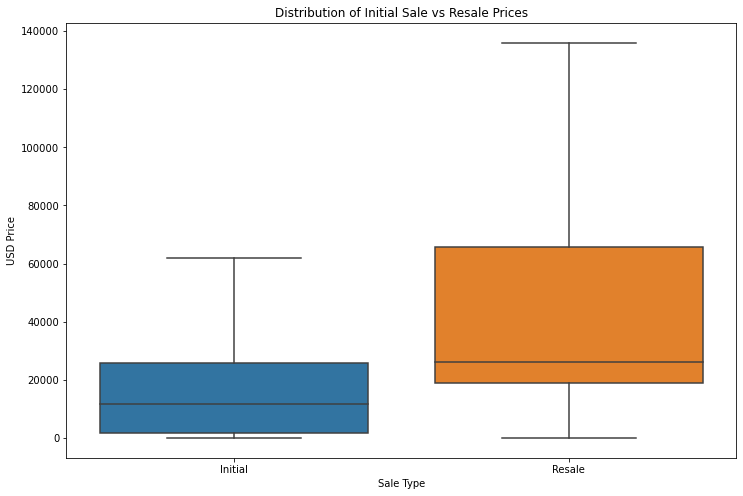

In [4]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
dataset_path = "First Draft dataset.csv"  # Replace with your dataset path
nft_data = pd.read_csv(dataset_path, parse_dates=['timestamp', 'minted_timestamp'])

# Sort the dataset by token_id and timestamp
nft_data_sorted = nft_data.sort_values(by=['token_id', 'timestamp'])

# Label each transaction as 'Initial' or 'Resale'
nft_data_sorted['sale_type'] = nft_data_sorted.groupby('token_id').cumcount()
nft_data_sorted['sale_type'] = nft_data_sorted['sale_type'].apply(lambda x: 'Initial' if x == 0 else 'Resale')

# Generate the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=nft_data_sorted, x='sale_type', y='usd_price', showfliers=False)
plt.title('Distribution of Initial Sale vs Resale Prices')
plt.xlabel('Sale Type')
plt.ylabel('USD Price')
plt.show()


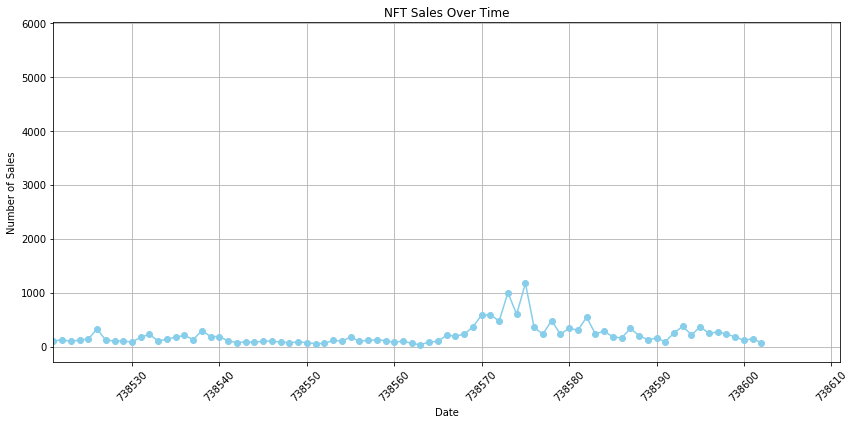

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming your data is loaded into a DataFrame named 'df'
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert timestamp to datetime

# Group sales by date and count them
sales_over_time = df.groupby(df['timestamp'].dt.date).size()

# Create a line plot
plt.figure(figsize=(12, 6))
x = mdates.date2num(sales_over_time.index)  # Convert dates to numerical values
plt.plot(x, sales_over_time.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.title('NFT Sales Over Time')
plt.xticks(rotation=45)
plt.grid(True)

# Adjust the axis limits to zoom in on a specific range (customize these values)
start_date = pd.to_datetime('2023-01-01')  # Replace with your desired start date
end_date = pd.to_datetime('2023-04-01')   # Replace with your desired end date
plt.xlim(mdates.date2num(start_date), mdates.date2num(end_date))  # Convert dates to numerical values

# Show the plot
plt.tight_layout()
plt.show()


In [1]:
dataset_path = "First Draft dataset.csv"

In [5]:
df = pd.read_csv(dataset_path)

C:\ProgramData\Anaconda3_2020\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


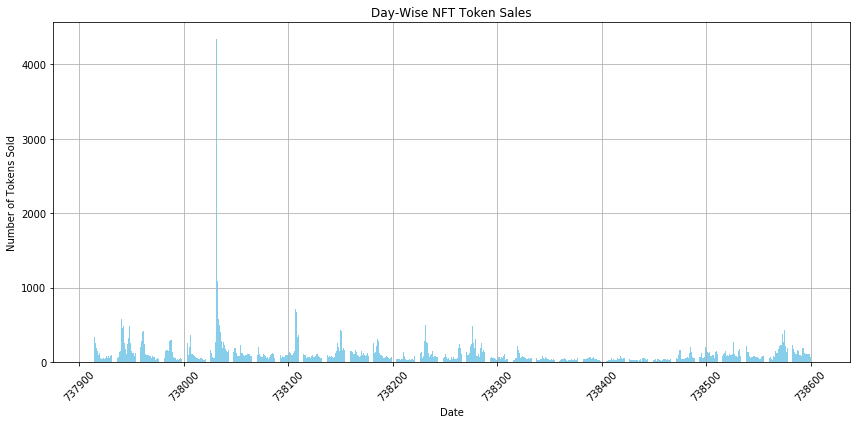

In [12]:
# Group sales by day and count unique token IDs
tokens_sold_daywise = df.groupby(df['timestamp'].dt.date)['token_id'].nunique()

# Create a bar plot for day-wise token count
plt.figure(figsize=(12, 6))
x = mdates.date2num(tokens_sold_daywise.index)  # Convert dates to numerical values
plt.bar(x, tokens_sold_daywise.values, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Tokens Sold')
plt.title('Day-Wise NFT Token Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\ProgramData\Anaconda3_2020\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


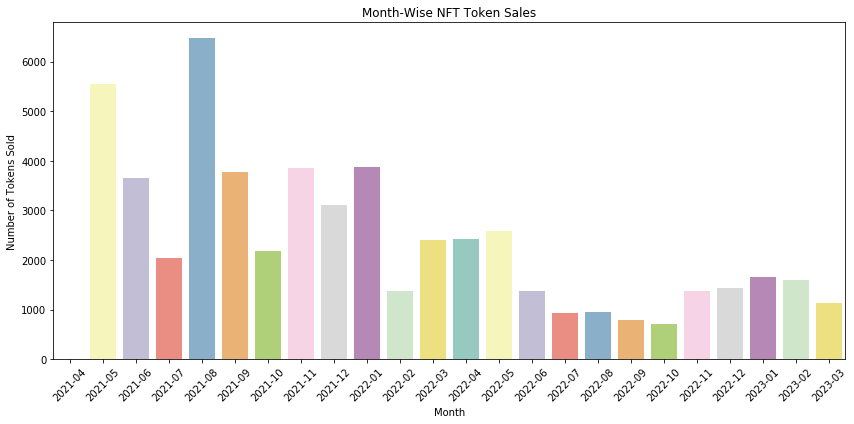

In [13]:
# Group sales by month and count unique token IDs
tokens_sold_monthwise = df.groupby(df['timestamp'].dt.to_period('M'))['token_id'].nunique()

# Create a bar plot for month-wise token count
plt.figure(figsize=(12, 6))
sns.barplot(x=tokens_sold_monthwise.index.strftime('%Y-%m'), y=tokens_sold_monthwise.values, palette='Set3')
plt.xlabel('Month')
plt.ylabel('Number of Tokens Sold')
plt.title('Month-Wise NFT Token Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\ProgramData\Anaconda3_2020\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


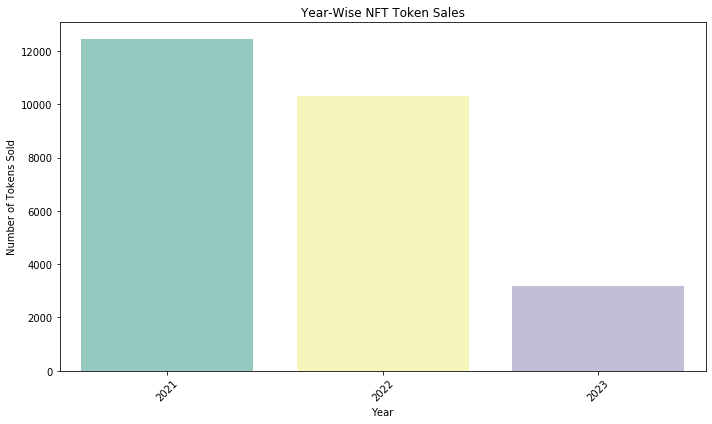

In [14]:
# Group sales by year and count unique token IDs
tokens_sold_yearwise = df.groupby(df['timestamp'].dt.to_period('Y'))['token_id'].nunique()

# Create a bar plot for year-wise token count
plt.figure(figsize=(10, 6))
sns.barplot(x=tokens_sold_yearwise.index.strftime('%Y'), y=tokens_sold_yearwise.values, palette='Set3')
plt.xlabel('Year')
plt.ylabel('Number of Tokens Sold')
plt.title('Year-Wise NFT Token Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


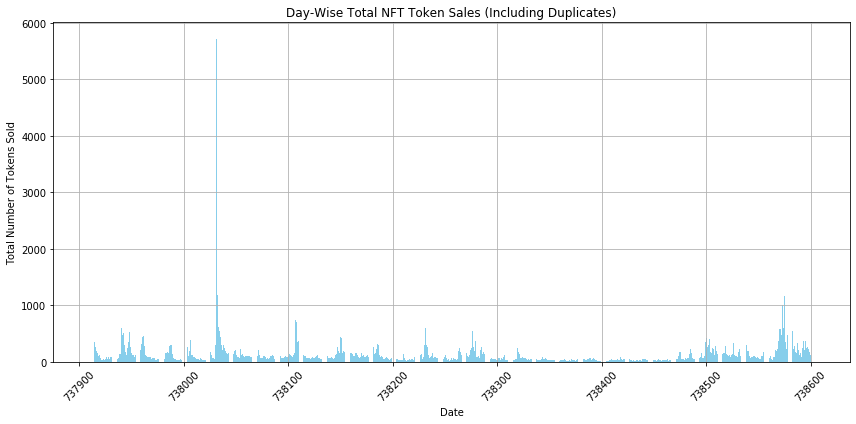

In [18]:
## Create a bar plot for day-wise token count with custom colors
plt.figure(figsize=(12, 6))
x = mdates.date2num(all_tokens_sold_daywise.index)  # Convert dates to numerical values
plt.bar(x, all_tokens_sold_daywise.values, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Total Number of Tokens Sold')
plt.title('Day-Wise Total NFT Token Sales (Including Duplicates)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


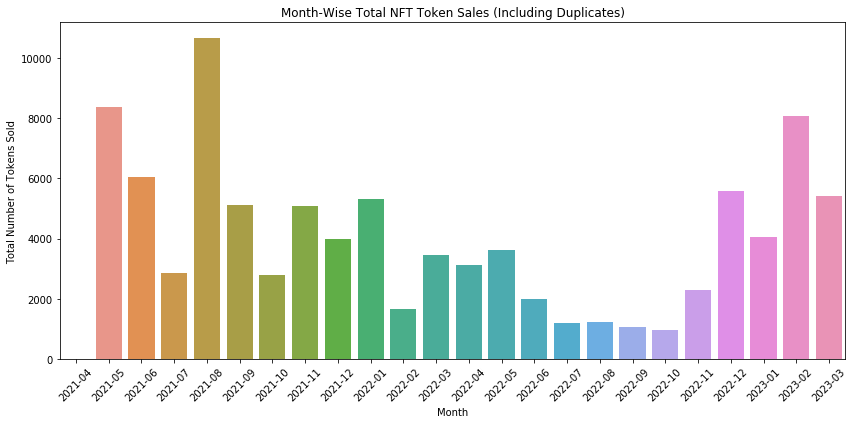

In [20]:
# Create a bar plot for month-wise token count with original colors
plt.figure(figsize=(12, 6))
sns.barplot(x=all_tokens_sold_monthwise.index.strftime('%Y-%m'), y=all_tokens_sold_monthwise.values)
plt.xlabel('Month')
plt.ylabel('Total Number of Tokens Sold')
plt.title('Month-Wise Total NFT Token Sales (Including Duplicates)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


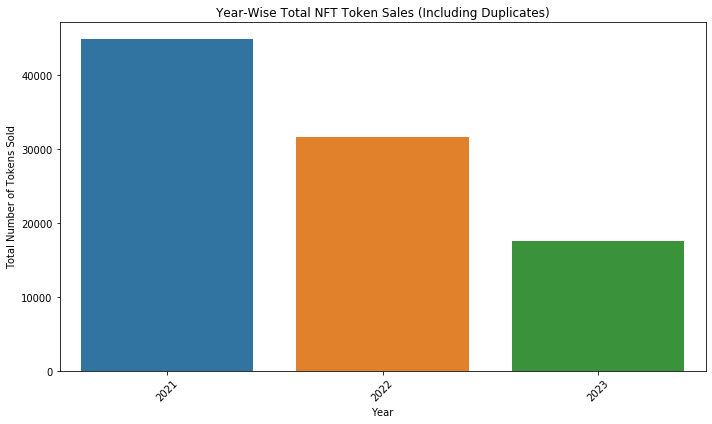

In [21]:
# Create a bar plot for year-wise token count with original colors
plt.figure(figsize=(10, 6))
sns.barplot(x=all_tokens_sold_yearwise.index.strftime('%Y'), y=all_tokens_sold_yearwise.values)
plt.xlabel('Year')
plt.ylabel('Total Number of Tokens Sold')
plt.title('Year-Wise Total NFT Token Sales (Including Resale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


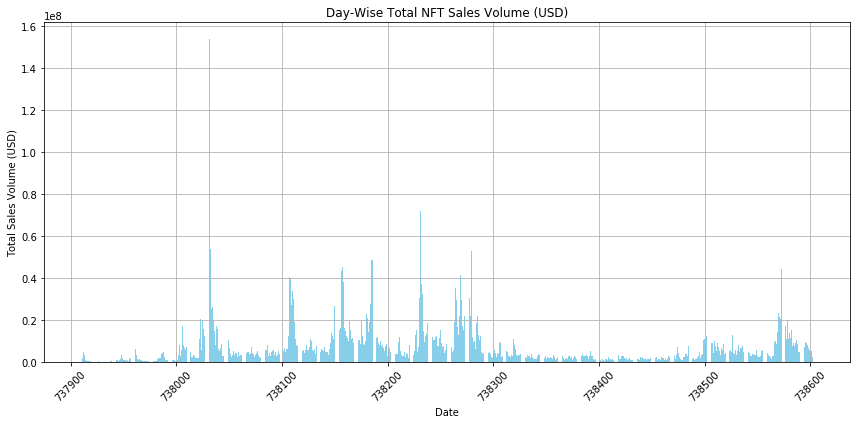

In [22]:
# Group sales by day and sum the USD prices
total_volume_daywise = df.groupby(df['timestamp'].dt.date)['usd_price'].sum()

# Create a bar plot for day-wise total sales volume
plt.figure(figsize=(12, 6))
x = mdates.date2num(total_volume_daywise.index)  # Convert dates to numerical values
plt.bar(x, total_volume_daywise.values, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Total Sales Volume (USD)')
plt.title('Day-Wise Total NFT Sales Volume (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\ProgramData\Anaconda3_2020\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


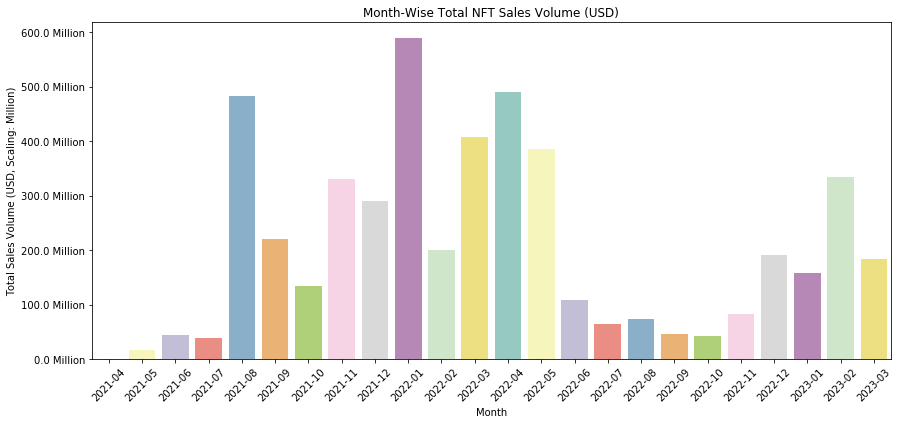

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group sales by month and sum the USD prices
total_volume_monthwise = df.groupby(df['timestamp'].dt.to_period('M'))['usd_price'].sum()

# Determine the appropriate scaling factor for the y-axis labels
max_value = total_volume_monthwise.max()
if max_value >= 1e6:
    scaling_factor = 1e6  # Use millions
    scaling_label = 'Million'
elif max_value >= 1e3:
    scaling_factor = 1e3  # Use thousands
    scaling_label = 'Thousand'
else:
    scaling_factor = 1  # No scaling needed
    scaling_label = ''

# Create a bar plot for month-wise total sales volume with scaling
plt.figure(figsize=(12, 6))
sns.barplot(
    x=total_volume_monthwise.index.strftime('%Y-%m'),
    y=total_volume_monthwise.values / scaling_factor,  # Apply scaling
    palette='Set3'
)
plt.xlabel('Month')
plt.ylabel(f'Total Sales Volume (USD, Scaling: {scaling_label})')
plt.title('Month-Wise Total NFT Sales Volume (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

# Format y-axis labels with appropriate scaling
if scaling_label:
    plt.gca().get_yaxis().set_major_formatter(
        plt.FuncFormatter(lambda x, loc: f'{x:.1f} {scaling_label}'))
    
plt.show()

C:\ProgramData\Anaconda3_2020\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


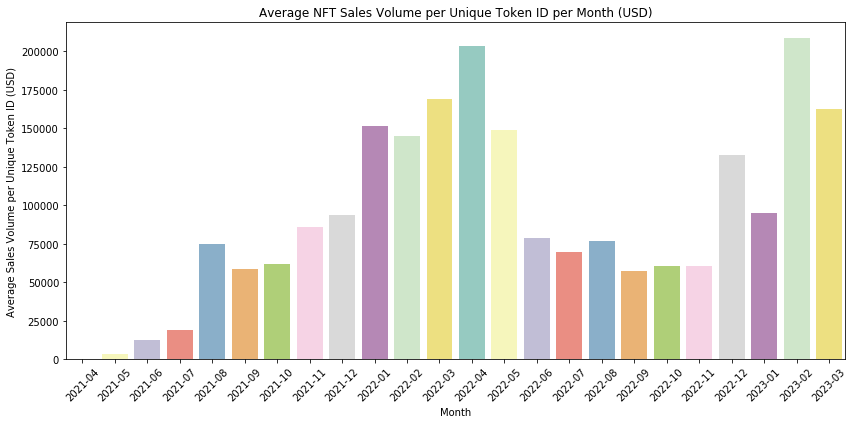

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group sales by month and calculate the total USD volume considering unique token IDs
total_volume_per_month = df.groupby([df['timestamp'].dt.to_period('M')])['usd_price'].sum()

# Group sales by month and calculate the count of unique token IDs sold in each month
unique_tokens_per_month = df.groupby([df['timestamp'].dt.to_period('M')])['token_id'].nunique()

# Calculate the average USD volume per unique token ID for each month
average_volume_per_token_per_month = total_volume_per_month / unique_tokens_per_month

# Create a bar plot for average USD volume per unique token ID per month
plt.figure(figsize=(12, 6))
sns.barplot(x=average_volume_per_token_per_month.index.strftime('%Y-%m'), y=average_volume_per_token_per_month.values, palette='Set3')
plt.xlabel('Month')
plt.ylabel('Average Sales Volume per Unique Token ID (USD)')
plt.title('Average NFT Sales Volume per Unique Token ID per Month (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\ProgramData\Anaconda3_2020\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


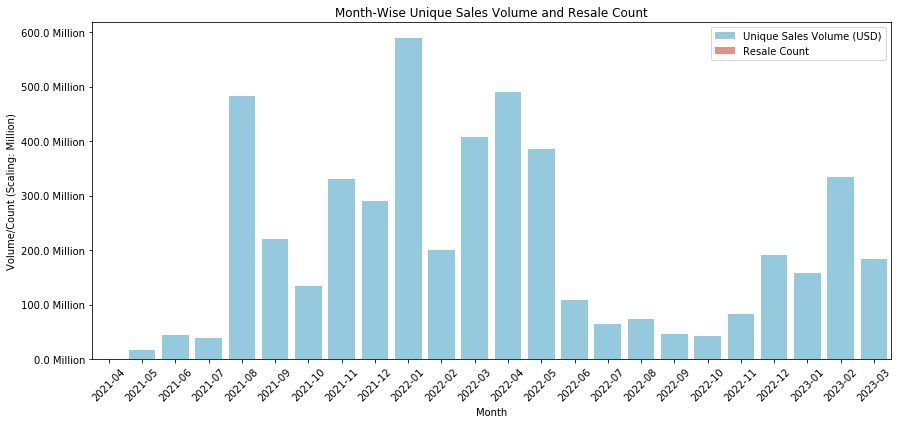

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group sales by month and calculate the total USD volume considering unique token IDs
total_volume_monthwise = df.groupby(df['timestamp'].dt.to_period('M'))['usd_price'].sum()

# Group sales by month and calculate the count of unique token IDs sold in each month
unique_tokens_per_month = df.groupby(df['timestamp'].dt.to_period('M'))['token_id'].nunique()

# Calculate the resale count per month (total count - unique count)
resale_count_per_month = df.groupby(df['timestamp'].dt.to_period('M'))['token_id'].count() - unique_tokens_per_month

# Determine the appropriate scaling factor for the y-axis labels
max_value = max(total_volume_monthwise.max(), resale_count_per_month.max())
if max_value >= 1e6:
    scaling_factor = 1e6  # Use millions
    scaling_label = 'Million'
elif max_value >= 1e3:
    scaling_factor = 1e3  # Use thousands
    scaling_label = 'Thousand'
else:
    scaling_factor = 1  # No scaling needed
    scaling_label = ''

# Create a bar plot for both unique USD sales volume and resale count with scaling
plt.figure(figsize=(12, 6))
sns.barplot(
    x=total_volume_monthwise.index.strftime('%Y-%m'),
    y=total_volume_monthwise.values / scaling_factor,  # Apply scaling
    color='skyblue',
    label='Unique Sales Volume (USD)'
)
sns.barplot(
    x=resale_count_per_month.index.strftime('%Y-%m'),
    y=resale_count_per_month.values / scaling_factor,  # Apply scaling
    color='salmon',
    label='Resale Count'
)
plt.xlabel('Month')
plt.ylabel(f'Volume/Count (Scaling: {scaling_label})')
plt.title('Month-Wise Unique Sales Volume and Resale Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Format y-axis labels with appropriate scaling
if scaling_label:
    plt.gca().get_yaxis().set_major_formatter(
        plt.FuncFormatter(lambda x, loc: f'{x:.1f} {scaling_label}'))

plt.show()

plt.show()


C:\ProgramData\Anaconda3_2020\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


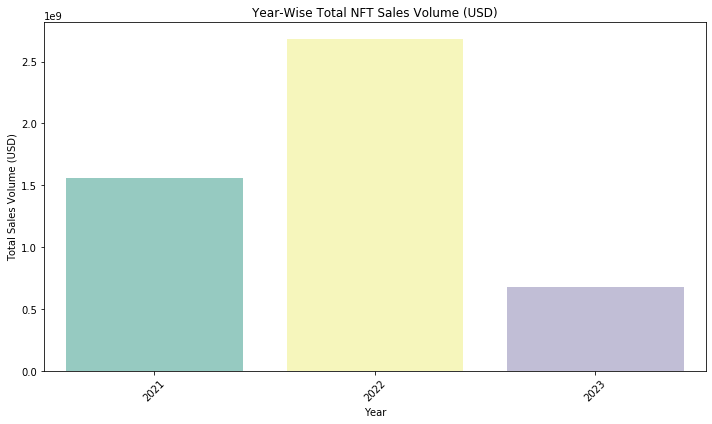

In [24]:
# Group sales by year and sum the USD prices
total_volume_yearwise = df.groupby(df['timestamp'].dt.to_period('Y'))['usd_price'].sum()

# Create a bar plot for year-wise total sales volume
plt.figure(figsize=(10, 6))
sns.barplot(x=total_volume_yearwise.index.strftime('%Y'), y=total_volume_yearwise.values, palette='Set3')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume (USD)')
plt.title('Year-Wise Total NFT Sales Volume (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

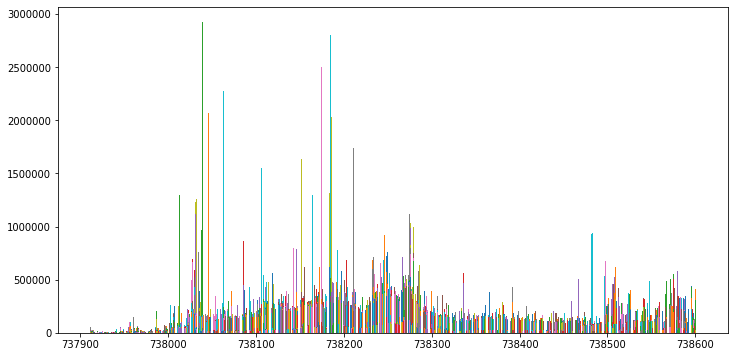

In [25]:
# Group sales by day and calculate total USD volume per unique token ID
total_volume_per_token_daywise = df.groupby([df['timestamp'].dt.date, 'token_id'])['usd_price'].sum().reset_index()

# Create a bar plot for day-wise total sales volume per unique token ID
plt.figure(figsize=(12, 6))
for token_id, data in total_volume_per_token_daywise.groupby('token_id'):
    x = mdates.date2num(data['timestamp'])  # Convert dates to numerical values
    plt.bar(x, data['usd_price'], label=f'Token ID {token_id}')
plt.xlabel('Date')
plt.ylabel('Total Sales Volume (USD)')
plt.title('Day-Wise Total NFT Sales Volume per Unique Token ID (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Group sales by month and calculate total USD volume per unique token ID
total_volume_per_token_monthwise = df.groupby([df['timestamp'].dt.to_period('M'), 'token_id'])['usd_price'].sum().reset_index()

# Create a bar plot for month-wise total sales volume per unique token ID
plt.figure(figsize=(12, 6))
for token_id, data in total_volume_per_token_monthwise.groupby('token_id'):
    sns.barplot(x=data['timestamp'].dt.strftime('%Y-%m'), y=data['usd_price'], label=f'Token ID {token_id}')
plt.xlabel('Month')
plt.ylabel('Total Sales Volume (USD)')
plt.title('Month-Wise Total NFT Sales Volume per Unique Token ID (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\ProgramData\Anaconda3_2020\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


KeyboardInterrupt: 

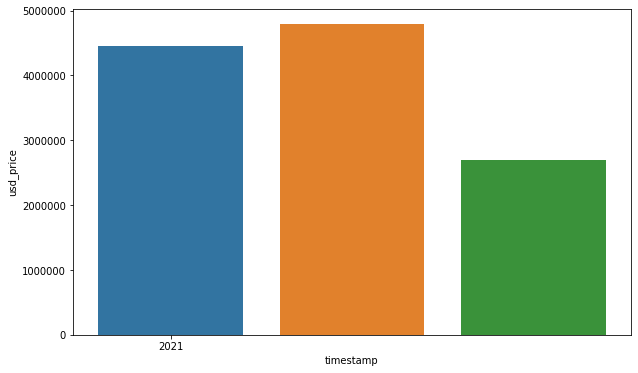

In [26]:
# Group sales by year and calculate total USD volume per unique token ID
total_volume_per_token_yearwise = df.groupby([df['timestamp'].dt.to_period('Y'), 'token_id'])['usd_price'].sum().reset_index()

# Create a bar plot for year-wise total sales volume per unique token ID
plt.figure(figsize=(10, 6))
for token_id, data in total_volume_per_token_yearwise.groupby('token_id'):
    sns.barplot(x=data['timestamp'].dt.strftime('%Y'), y=data['usd_price'], label=f'Token ID {token_id}')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume (USD)')
plt.title('Year-Wise Total NFT Sales Volume per Unique Token ID (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
